# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Nov 22 12:54:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(f'Torch Version: {torch.__version__}')

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device: {device}')

Torch Version: 2.1.0+cu118
Device: {device}


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Self-driving cars, such as Tesla using computer vision to percieve what's happening on the road. See Tesla AI day for more - https://youtu.be/j0z4FweCy4M
2. Healthcare imaging, such as using computer vision to help interpret X-rays. Google also uses computer vision for detecting polyps in the intenstines - https://ai.googleblog.com/2021/08/improved-detection-of-elusive-polyps.html
3. Security, computer vision can be used to detect whether someone is invading your home or not - https://store.google.com/au/product/nest_cam_battery?hl=en-GB

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.

In other words, if a model is overfitting, it's learning the training data *too well* and these patterns don't generalize to unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

See this article for some ideas: https://elitedatascience.com/overfitting-in-machine-learning

3 ways to prevent overfitting:
1. **Regularization techniques** - You could use [dropout on your neural networks](https://en.wikipedia.org/wiki/Dilution_(neural_networks)), dropout involves randomly removing neurons in different layers so that the remaining neurons hopefully learn more robust weights/patterns.
2. **Use a different model** - maybe the model you're using for a specific problem is too complicated, as in, it's learning the data too well because it has so many layers. You could remove some layers to simplify your model. Or you could pick a totally different model altogether, one that may be more suited to your particular problem. Or... you could also use [transfer learning](https://en.wikipedia.org/wiki/Transfer_learning) (taking the patterns from one model and applying them to your own problem).
3. **Reduce noise in data/cleanup dataset/introduce data augmentation techniques** - If the model is learning the data too well, it might be just memorizing the data, including the noise. One option would be to remove the noise/clean up the dataset or if this doesn't, you can introduce artificial noise through the use of data augmentation to artificially increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check version
print(f'PyTorch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


MINST
torchvision.datasets.MNIST(root: str, train: bool = True, transform: Optional[Callable] = None, target_transform: Optional[Callable] = None, download: bool = False)

In [4]:
# Setup train_data
train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=ToTensor(),
                            target_transform=None)

# Setup test_data
test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=ToTensor(),
                           target_transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 102746900.33it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 93685764.75it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27918179.38it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22203413.48it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [6]:
# See first training sample
img, label = train_data[0]

In [7]:
# Check the shape of our image
img.shape, label

(torch.Size([1, 28, 28]), 5)

In [8]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [9]:
train_data.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [10]:
img.squeeze().shape

torch.Size([28, 28])

## 6. Visualize at least 5 different samples of the MNIST training dataset.

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '5 - five')

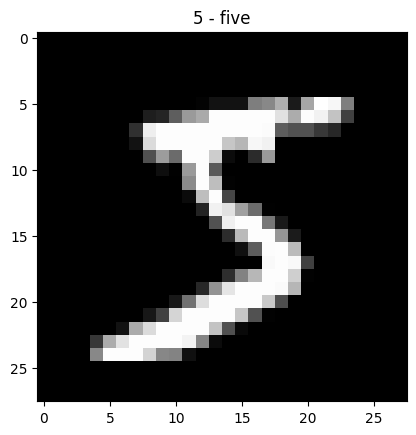

In [11]:
import matplotlib.pyplot as plt
img, label = train_data[0]
print(f'Image Shape: {img.shape}')
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])

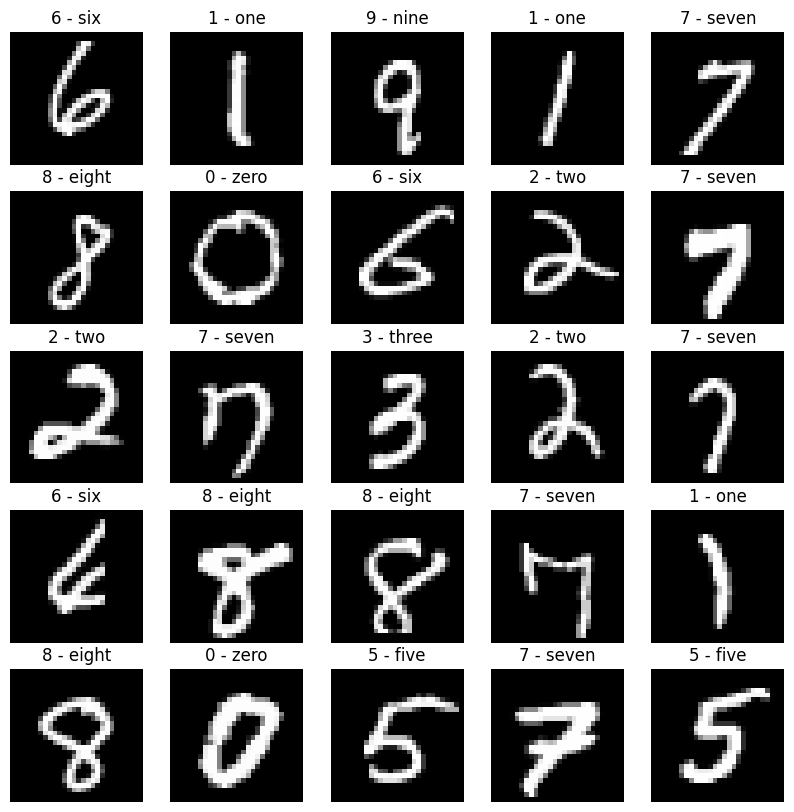

In [12]:
# Make random image plot
import random

fig = plt.figure(figsize=(10, 10))
rows, columns = 5, 5
for i in range(1, rows * columns + 1):
  img, label = train_data[random.randint(0,len(train_data))]
  plt.subplot(rows, columns, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Print out dataloader results
print(f'Train Dataloaders: {train_dataloader}\nLength: {len(train_dataloader)}\nBatch Size: {train_dataloader.batch_size}')
print(f'Test Dataloaders: {test_dataloader}\nLength: {len(test_dataloader)}\nBatch Size: {test_dataloader.batch_size}')

Train Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7fd9b76f9720>
Length: 1875
Batch Size: 32
Test Dataloaders: <torch.utils.data.dataloader.DataLoader object at 0x7fd9b76f9870>
Length: 313
Batch Size: 32


In [14]:
# Check out train_dataloader
train_feature_batch, train_label_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

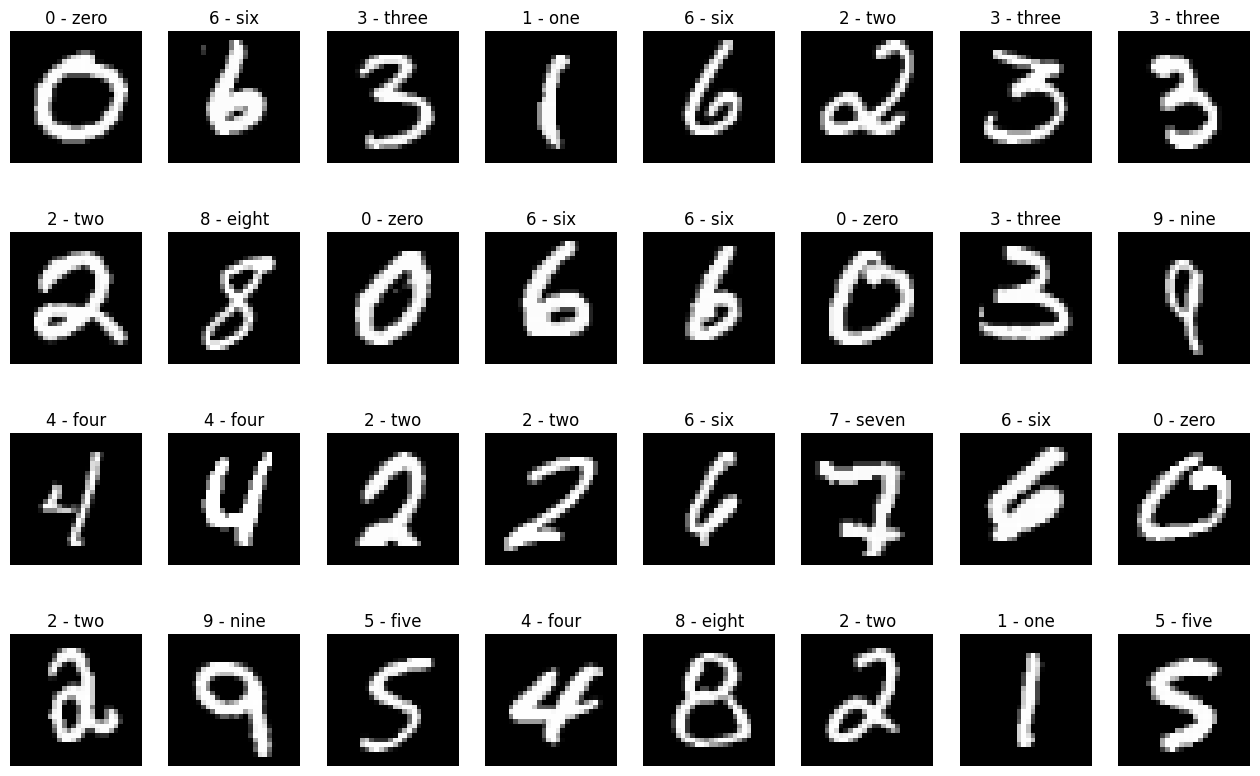

In [15]:
# Show one batch of data
fig = plt.figure(figsize=(16, 10))
rows, columns = 4, 8
for i in range(len(train_feature_batch)):
  plt.subplot(rows, columns, i+1)
  plt.imshow(train_feature_batch[i].squeeze(), cmap='gray')
  plt.title(class_names[train_label_batch[i]])
  plt.axis(False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [16]:
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [17]:
torch.manual_seed(42)
INPUT_SHAPE = 1
HIDDEN_UNITS = 10
OUTPUT_SHAPE = len(class_names)

In [18]:
# Testing out output_shape for block 1
# Create a new conv_layer_1, conv_layer_2, relu_layer, maxpool_layer, flatten_layerwith same setting
conv_layer_1 = nn.Conv2d(in_channels=INPUT_SHAPE,
                       out_channels=HIDDEN_UNITS,
                       kernel_size=3,
                       stride=1,
                       padding=1)
conv_layer_2 = nn.Conv2d(in_channels=HIDDEN_UNITS,
                       out_channels=HIDDEN_UNITS,
                       kernel_size=3,
                       stride=1,
                       padding=1)
relu_layer = nn.ReLU()
maxpool_layer = nn.MaxPool2d(kernel_size=2)
flatten_layer = nn.Flatten()

print(f'Block 1\n----------')
output = conv_layer_1(train_feature_batch)
print(f'Output Shape on conv_layer_1: {output.shape}')
output = relu_layer(output)
print(f'Output Shape on relu_layer: {output.shape}')
output = conv_layer_2(output)
print(f'Output Shape on conv_layer_2: {output.shape}')
output = relu_layer(output)
print(f'Output Shape on relu_layer: {output.shape}')
output = maxpool_layer(output)
print(f'Output Shape on maxpool_output_1: {output.shape}')

print(f'\nBlock 2\n---------')
output = conv_layer_2(output)
print(f'Output Shape on conv_layer_2: {output.shape}')
output = relu_layer(output)
print(f'Output Shape on relu_layer: {output.shape}')
output = conv_layer_2(output)
print(f'Output Shape on conv_layer_2: {output.shape}')
output = relu_layer(output)
print(f'Output Shape on relu_layer: {output.shape}')
output = maxpool_layer(output)
print(f'Output Shape on maxpool_output_1: {output.shape}')

print(f'\nClassifier\n--------')
output = flatten_layer(output)
print(f'Output Shape on flatten_layer: {output.shape}')

Block 1
----------
Output Shape on conv_layer_1: torch.Size([32, 10, 28, 28])
Output Shape on relu_layer: torch.Size([32, 10, 28, 28])
Output Shape on conv_layer_2: torch.Size([32, 10, 28, 28])
Output Shape on relu_layer: torch.Size([32, 10, 28, 28])
Output Shape on maxpool_output_1: torch.Size([32, 10, 14, 14])

Block 2
---------
Output Shape on conv_layer_2: torch.Size([32, 10, 14, 14])
Output Shape on relu_layer: torch.Size([32, 10, 14, 14])
Output Shape on conv_layer_2: torch.Size([32, 10, 14, 14])
Output Shape on relu_layer: torch.Size([32, 10, 14, 14])
Output Shape on maxpool_output_1: torch.Size([32, 10, 7, 7])

Classifier
--------
Output Shape on flatten_layer: torch.Size([32, 490])


In [19]:
# Recreate Sequential Layer to test
conv_block_1 = nn.Sequential(
    nn.Conv2d(in_channels=INPUT_SHAPE,
              out_channels=HIDDEN_UNITS,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=HIDDEN_UNITS,
              out_channels=HIDDEN_UNITS,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
)
conv_block_2 = nn.Sequential(
    nn.Conv2d(in_channels=HIDDEN_UNITS,
              out_channels=HIDDEN_UNITS,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.Conv2d(in_channels=HIDDEN_UNITS,
              out_channels=HIDDEN_UNITS,
              kernel_size=3,
              stride=1,
              padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2)
)
flatten_layer = nn.Flatten()

print(f'Block 1\n----------')
output = conv_block_1(train_feature_batch)
print(f'Output Shape on conv_block_1: {output.shape}')
print(f'Block 2\n----------')
output = conv_block_2(output)
print(f'Output Shape on conv_block_2: {output.shape}')
print(f'\nClassifier\n--------')
output = flatten_layer(output)
print(f'Output Shape on flatten_layer: {output.shape}')
final_linear_input = len(output[0])

Block 1
----------
Output Shape on conv_block_1: torch.Size([32, 10, 14, 14])
Block 2
----------
Output Shape on conv_block_2: torch.Size([32, 10, 7, 7])

Classifier
--------
Output Shape on flatten_layer: torch.Size([32, 490])


In [20]:
class MNISTModel(nn.Module):
  '''
  Model architecture copying TinyVGG from:
  https://poloclub.github.io/cnn-explainer/
  '''
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):

    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=490,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [21]:
#Instatiate the model
model = MNISTModel(input_shape=INPUT_SHAPE,
                   hidden_units=HIDDEN_UNITS,
                   output_shape=OUTPUT_SHAPE)
model

MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [22]:
# import torchmetrics
try:
  from torchmetrics import Accuracy
except:
  !pip install torchmetrics
  from torchmetrics import Accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.0 MB/s eta 0:00:00


In [23]:
# Setup Loss/Acc Fn and Optimizer
loss_fn = nn.CrossEntropyLoss()
acc_fn = Accuracy(task='multiclass', num_classes=len(class_names))
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

In [24]:
# Define train_step and test_step functions

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy,
               optimizer: torch.optim.Optimizer,
               device: torch.device=device):

  # Initialize train_loss and train_acc
  train_loss, train_acc = 0, 0

  # Send model to device
  model.to(device)

  # Send acc_fn to device
  acc_fn = acc_fn.to(device)

  # Loop through batches from data_loader
  for batch, (X, y) in enumerate(data_loader):
    # Send data to device
    X, y = X.to(device), y.to(device)
    # Forward Pass
    y_pred = model(X)
    # Loss/Acc Calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss
    acc = acc_fn(y_pred.argmax(dim=1), y)
    train_acc += acc
    # Optimizer zero_grad / Loss Backward / Optimizer Step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  # Calculate loss/acc per epoch and print
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}')

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn: Accuracy,
              device: torch.device=device):

  # Initialize test_loss and test_acc
  test_loss, test_acc = 0, 0

  # Send acc_fn to device
  acc_fn = acc_fn.to(device)

  # Model to evaluation and inference mode
  model.eval()
  with torch.inference_mode():
    for batch, (X, y) in enumerate(data_loader):
      # Send data to device
      X, y = X.to(device), y.to(device)
      # Forward Pass
      y_pred = model(X)
      # Loss/Acc Calculation
      loss = loss_fn(y_pred, y)
      test_loss += loss
      acc = acc_fn(y_pred.argmax(dim=1), y)
      test_acc += acc

    # Avg Loss/Acc metrics per batch and print
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}')

In [25]:
# Define functions to measure time
from functools import wraps
import time

def timeit(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        print(f'Function {func.__name__}{args} {kwargs} Took {total_time:.4f} seconds')
        return result
    return timeit_wrapper

In [26]:
# Def function to train the model
from tqdm.auto import tqdm

@timeit
def run(epoch: int,
        device: torch.device=device):
  epochs = 5
  for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n----------')

    train_step(model=model,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              acc_fn=acc_fn,
              optimizer=optimizer,
              device=device)

    test_step(model=model,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              acc_fn=acc_fn,
              device=device)

In [27]:
# # Test CPU
# run(epoch=5,
#     device='cpu')

In [28]:
# Test GPU
run(epoch=5,
    device='cuda')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
----------
Train Loss: 0.2422 | Train Acc: 0.9219
Test Loss: 0.0775 | Test Acc: 0.9727
Epoch: 1
----------
Train Loss: 0.0771 | Train Acc: 0.9763
Test Loss: 0.0873 | Test Acc: 0.9705
Epoch: 2
----------
Train Loss: 0.0618 | Train Acc: 0.9803
Test Loss: 0.0494 | Test Acc: 0.9825
Epoch: 3
----------
Train Loss: 0.0515 | Train Acc: 0.9835
Test Loss: 0.0568 | Test Acc: 0.9840
Epoch: 4
----------
Train Loss: 0.0472 | Train Acc: 0.9852
Test Loss: 0.0477 | Test Acc: 0.9852
Function run() {'epoch': 5, 'device': 'cuda'} Took 91.1068 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [29]:
next(model.parameters()).device

device(type='cuda', index=0)

In [30]:
# define function to evaluate model to device agonistics

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: Accuracy,
               device: torch.device=device):
  """Evaluates a given model on a given dataset.

  Args:
      model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
      data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
      loss_fn (torch.nn.Module): The loss function of model.
      accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
      device (str, optional): Target device to compute on. Defaults to device.

  Returns:
      (dict): Results of model making predictions on data_loader.
  """
  # Send model to device
  model.to(device)

  # Send acc_fn to device
  acc_fn.to(device)

  #Evaluate
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)
      # Forward Pass
      y_pred = model(X)
      # Loss/Acc Calculation
      loss += loss_fn(y_pred, y)
      acc += acc_fn(y_pred.argmax(dim=1), y)

    # Scale loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

    # put result into dictionary
    result = {'model_name': model.__class__.__name__,
              'model_loss': loss.item(),
              'model_acc': acc.item()}

    return result

In [31]:
model_result = eval_model(model=model,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          acc_fn=acc_fn,
                          device='cuda')
model_result

{'model_name': 'MNISTModel',
 'model_loss': 0.047666069120168686,
 'model_acc': 0.985223650932312}

In [32]:
# Make prediction
@timeit
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample, y in tqdm(test_data):
      # Map sample into tensor shape for model
      X = torch.unsqueeze(sample, dim=0).to(device)
      # Forward pass -> logits
      y_logits = model(X)
      # Calculate Probabilities (logits -> prediction probabilities)
      y_prob = torch.softmax(y_logits.squeeze(), dim=0)
      # Append as CPU
      pred_probs.append(y_prob.cpu())

  return torch.stack(pred_probs)


In [33]:
pred_probs = make_predictions(model=model,
                             data=test_data)

  0%|          | 0/10000 [00:00<?, ?it/s]

Function make_predictions() {'model': MNISTModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
), 'data': Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()} Took 14.7212 seconds


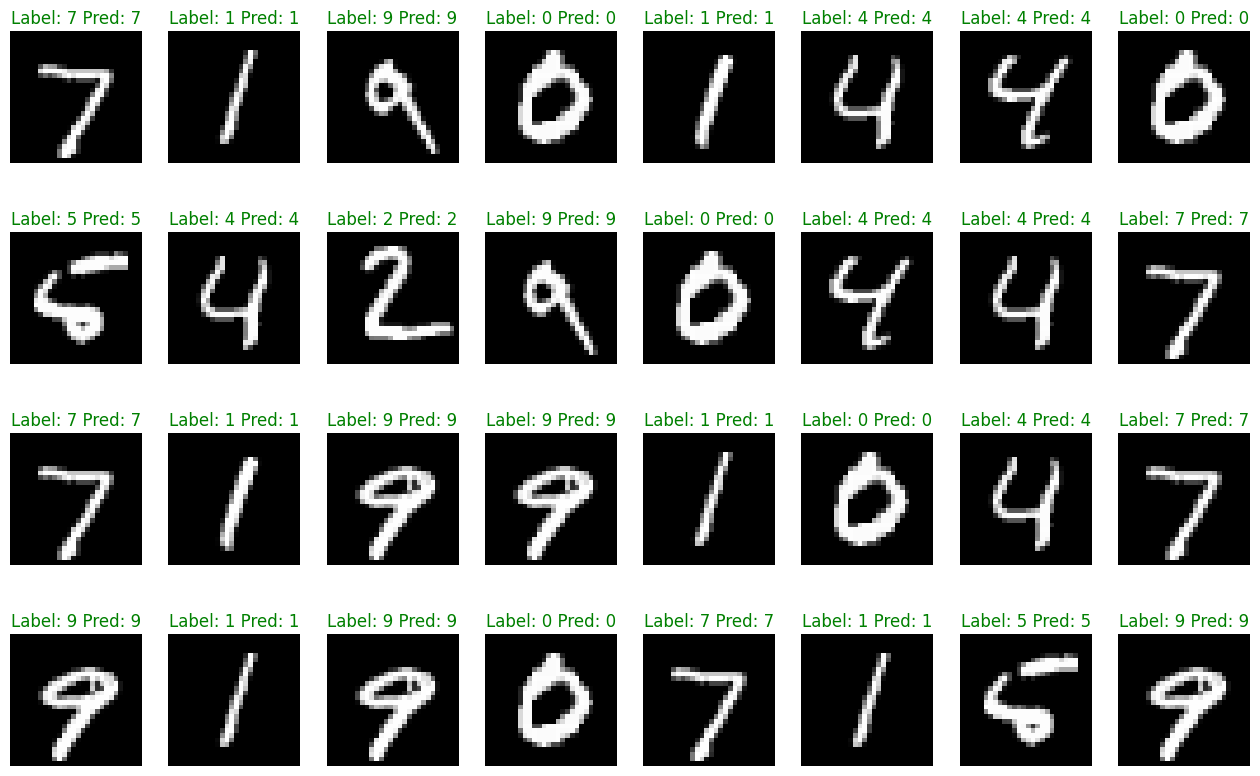

In [34]:
# Show random Prediction
import numpy as np
fig = plt.figure(figsize=(16, 10))
rows, columns = 4, 8
for i, index in enumerate(np.random.randint(0, len(class_names), size=rows*columns)):
  plt.subplot(rows, columns, i+1)
  plt.imshow(test_data.data[index].data, cmap='gray')
  color = 'g' if test_data.targets[index]==pred_probs[index].argmax(dim=0) else 'r'
  plt.title(f'Label: {test_data.targets[index]} Pred: {pred_probs[index].argmax(dim=0)}', c=color)
  plt.axis(False)

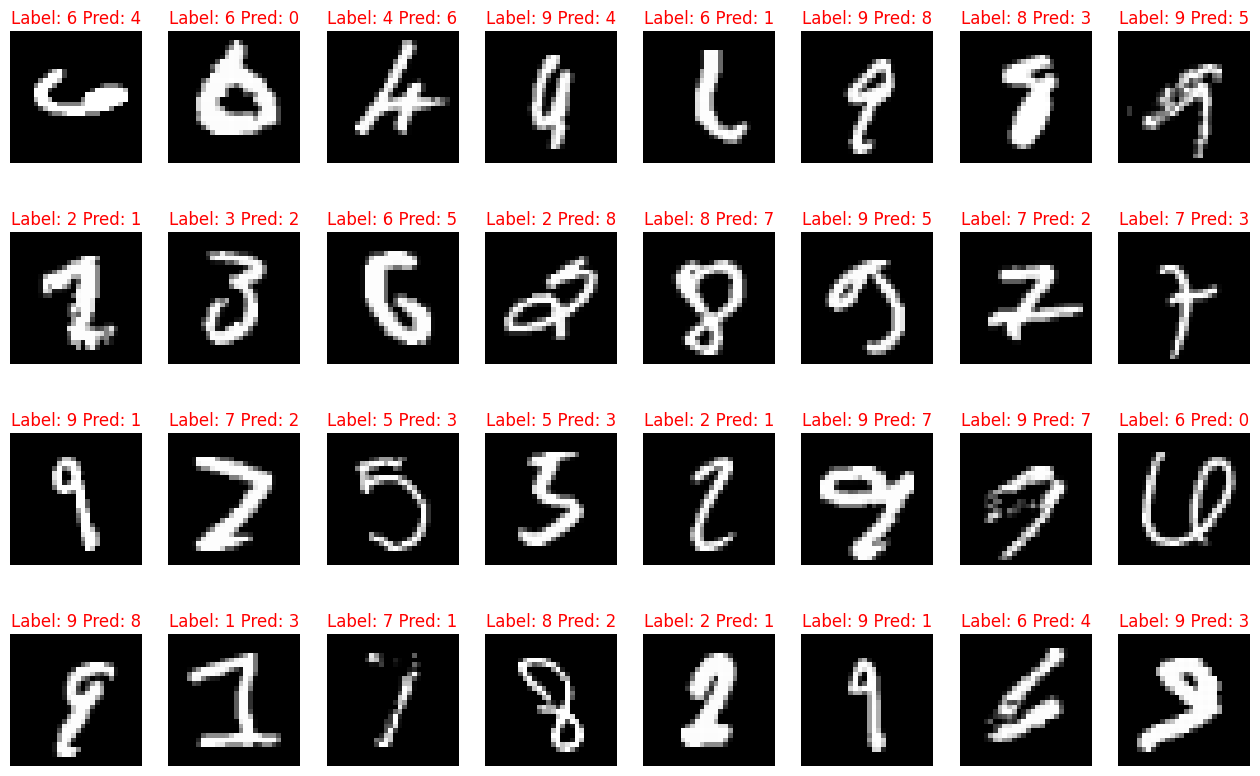

In [37]:
# Show incorrect predictions
import random
wrong_prediction_index = torch.nonzero(pred_probs.argmax(dim=1)!=test_data.targets).squeeze()

fig = plt.figure(figsize=(16, 10))
rows, cols = 4, 8
for i, index in enumerate(random.sample(list(wrong_prediction_index), k=rows*cols)):
  plt.subplot(rows, columns, i+1)
  plt.imshow(test_data.data[index].data, cmap='gray')
  color = 'g' if test_data.targets[index]==pred_probs[index].argmax(dim=0) else 'r'
  plt.title(f'Label: {test_data.targets[index]} Pred: {pred_probs[index].argmax(dim=0)}', c=color)
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [38]:
try:
  import torchmetrics
except:
  ! pip install torchmetrics
  import torchmetrics

In [39]:
try:
  import mlxtend
except:
  !pip install mlxtend
  import mlxtend

In [42]:
print(f'torchmetrics version: {torchmetrics.__version__}' )
print(f'mlxtend version: {mlxtend.__version__}')

torchmetrics version: 1.2.0
mlxtend version: 0.22.0


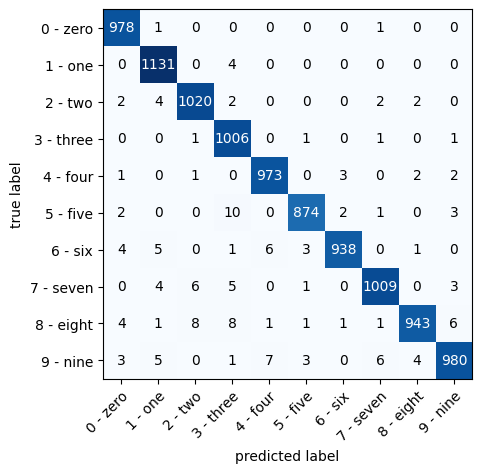

In [52]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

y_pred = pred_probs.argmax(dim=1).numpy()
y_target = test_data.targets.numpy()

cm = confusion_matrix(y_target=y_target,
                      y_predicted=y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                class_names=class_names)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [53]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [56]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=64,
                       kernel_size=3,
                       stride=2,
                       padding=1)

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.EMNIST`](https://pytorch.org/vision/stable/generated/torchvision.datasets.EMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [58]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualisation
import matplotlib.pyplot as plt

# Check version
print(f'PyTorch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [60]:
# Setup train_data
eminst_train_data = datasets.EMNIST(root='data',
                                    split='letters',
                                    train=True,
                                    download=True,
                                    transform=ToTensor(),
                                    target_transform=None)

# Setup test_data
eminst_test_data = datasets.EMNIST(root='data',
                                   split='letters',
                                   train=False,
                                   download=True,
                                   transform=ToTensor(),
                                   target_transform=None)

100%|██████████| 561753746/561753746 [00:07<00:00, 71440476.12it/s]


Extracting data/EMNIST/raw/gzip.zip to data/EMNIST/raw


In [61]:
eminst_train_data, eminst_test_data

(Dataset EMNIST
     Number of datapoints: 124800
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset EMNIST
     Number of datapoints: 20800
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [67]:
img, label = eminst_train_data[80]
img.shape, label

(torch.Size([1, 28, 28]), 22)

In [77]:
eminst_train_data.targets.unique(return_counts=True)

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
         19, 20, 21, 22, 23, 24, 25, 26]),
 tensor([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
         4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800,
         4800, 4800]))

In [79]:
eminst_class_names = eminst_train_data.classes
eminst_class_names

['N/A',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']